# Battle of the Giants

## ***Is India going to be a future superpower in Data Science?***






***An exploration of the Kaggle Data Science and Machine Learning Survey  2019 results***


# Summary

Based on the analysis of selected features we assume, that India has the potential to be an upcoming Data Science superpower and can have a high impact on the future of Data Science globally.

The ratio of Indian participants in the survey grew compared to the ratio of US participants by 20% from 2017 to 2019. Assuming these Indian participants are interested, apply or support digital technologies they increase their contribution to digital sciences.

Most of the Indian participants are young (<25 years) with less experience in Data Science and Machine Learning than US participants. But we could reveal, that they provide twice as many young developers into the digital market.

Indian participants are more likely to have a lower education degree than US participants. This could be derived by the assumption, that for learning Data Science nowadays you just need a digital device and no educational infrastructure. So, the degree for Data Scientists is not representative for their skills.


In [15]:
# inviting pandas and friends to the party
import pandas as pd, numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid") # set seaborn styles

In [16]:
# grabbing the raw data
df = pd.read_csv("../data_raw/multiple_choice_responses_2019.csv", low_memory=False)

In [17]:
# drop questions
df = df.drop(df.index[0])

# check for and drop duplicate rows
df = df.drop_duplicates()

# dropping columns based on string pattern
drop_all = ["Q26", "Time from Start to Finish", "Q11", "Q19"]

for col in drop_all:
    df = df.loc[:,~df.columns.str.contains(col)]

# rename columns for better readability
rename = {"Q1" : "age",
          "Q2" : "gender",
          "Q3" : "country",
          "Q4" : "degree",
          "Q5" : "position",
          "Q6" : "company_size",
          "Q10": "salary"
          }
df = df.rename(columns=rename)

In [18]:
# preparing 2017 and 2018 datasets for comparison

# import 2017
df_2017 = pd.read_csv("../data_raw/multipleChoiceResponses_2017.csv", engine='python')

# drop duplicates
df_2017 = df_2017.drop_duplicates()

# rename columns
rename_2017 = {"Age" : "age",
                "GenderSelect" : "gender",
                "Country" : "country",
                "FormalEducation" : "degree",
                "EmployerSize" : "company size",
                "LearningDataScienceTime" : "experience",
                "CompensationAmount" : "salary",
                "CompensationCurrency" : "currency",
                }

# select columns
df_2017 = df_2017[list(rename_2017.keys())]

# rename columns
df_2017 = df_2017.rename(columns=rename_2017)

# select countries
df_2017 = df_2017[(df_2017["country"] == "India") | (df_2017["country"] == "United States")]

In [19]:
# import 2018
df_2018 = pd.read_csv("../data_raw/multipleChoiceResponses_2018.csv", low_memory=False)

# drop duplicates
df_2018 = df_2018.drop_duplicates()

# rename columns
rename_2018 = {"Q2" : "age",
                "Q1" : "gender",
                "Q3" : "country",
                "Q4" : "degree",
                "Q8" : "experience",
                "Q9" : "salary",
                }
# select columns
df_2018 = df_2018[list(rename_2018.keys())]

# rename columns
df_2018 = df_2018.rename(columns=rename_2018)

# select countries
df_2018 = df_2018[(df_2018["country"] == "India") | (df_2018["country"] == "United States of America")]

In [20]:
# creating seperate dataframes for India and the US to make normalization more easy
india = df[df["country"] == "India"]
usa = df[df["country"] == "United States of America"]

In [21]:
# creating comparison dataframe containing both India and the US
df_comp = df[(df["country"] == "India") | (df["country"] == "United States of America")].copy()
df_country_comp = df_comp[["country"]]

## Looking at the survey results: A comparison between India and the US


Since over the last three years the two countries with the highest amount of responses for the Kaggle User Survey stayed constant we decided to take a closer look at these two lone giants in Data Science: the *United States* as a leading IT nation and *India* as a rapidly developing tech country.


**Hypothesis:** 
1. Is there a trend in influences, positions and roles in the world of Data Science?
2. Can we make assumptions on the role of India regarding the use and development of Data Science?
3. Where is the new generation of Data Scientist going to come from?
4. Is the US a stable nation regarding Data Science? Did they reach their full potential or are there signs of change?

<b>Please note</b> when talking about the population from India and the US we refer on the participants of the Kaggle User Surveys (2017/2018/2019) who stated their current origin is India or the US respectively.
This survey is not generally representative to the US, the Indian population or the Data Science community, but we can estimate trends and developments.

In [22]:
# data manipulation functions

# function to reverse dummy valiables based on column string pattern for whole dataframe
# may return list of unique values when labels_only is set to True

def undummy(df, col_pattern, labels_only=False):
    df_tmp = df.loc[:,df.columns.str.contains(col_pattern)]
    cols_to_bool = list(df_tmp.columns)

    df_tmp = df_tmp.fillna(0)

    labels = []
    for col in cols_to_bool:
        labels.append(df_tmp[col].value_counts().keys()[1])


    for col in cols_to_bool:
        df_tmp[col] = np.where(df_tmp[col] != 0, 1, 0)
        df_tmp[col] = df_tmp[col].astype(int)

    resources = []
    for col in cols_to_bool:
        resources.append(df_tmp[col].sum())

    labels

    resources = pd.DataFrame(data=resources, index=labels)
    resources = resources.rename(columns={0: "value"})
    resources = resources.sort_values(by="value", ascending=False)
    
    if labels_only == True:
        return labels
    return resources

In [23]:
# function to reverse dummy valiables based on column string pattern for single column

def undummy_single_col(df, col_name):
    sr_tmp = df[col_name]
    sr_tmp = sr_tmp.fillna(0)

    labels = sr_tmp.value_counts().keys().tolist()
    labels = pd.Series(labels).astype(str)
    labels = labels.str.replace("0", "None")

    resources = sr_tmp.value_counts().tolist()
    
    resources = pd.DataFrame(data=resources, index=labels)
    resources = resources.rename(columns={0: "value"})
    resources = resources.sort_values(by="value", ascending=False)

    return resources

In [24]:
# functions for calculating value percentages within given column
def perc(df, col):
    return round(100 * df[col].value_counts(normalize=True),2).to_frame()

In [25]:
# function for normalizing value distribution within given column for both India and the US
# return dataframe containing normalized values for given columns
def total_to_perc(df, df1, df2, col1, col2):
    df_perc = df.copy()
    df_perc = df_perc.drop(columns=[col1, col2])
    df_perc = df_perc.assign(india = df[col1].apply(lambda x: (x/len(df1))*100))
    df_perc = df_perc.assign(usa = df[col2].apply(lambda x: (x/len(df2))*100))
    return df_perc

In [26]:
# global plotting variables

# global figure size to use in the plots
figure_size = (12,6)

colors_pie_3 = ["yellowgreen", "coral", "cornflowerblue"]
colors_pie_2 = ["coral", "cornflowerblue"]
colors_bar_3 = ["cornflowerblue", "coral", "yellowgreen"]
colors_bar_2 = ["cornflowerblue", "coral"]

colors_years_2_in = ["peachpuff", "coral"]
colors_years_2_us = ["lightsteelblue", "cornflowerblue"]
colors_years_3_in = ["peachpuff", "coral", "sienna"]
colors_years_3_us = ["lightsteelblue", "cornflowerblue", "royalblue"]

# 1. Demographical exploration
## 1.1 Answers by country

In this analysis we are interested in answers from two distinct countries: India and the US.
Let's have a look at the ratio of the answers from people who live in India and the answers from people who live in the US.

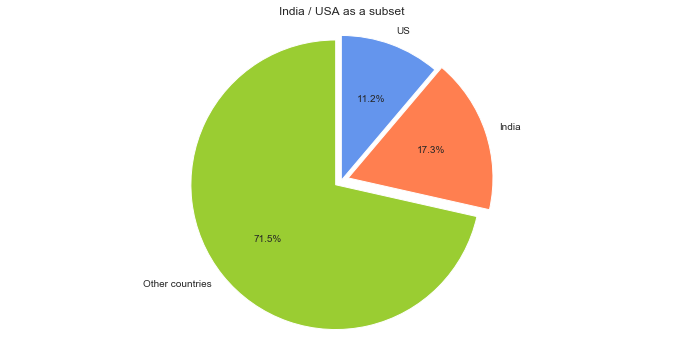

In [27]:
# plotting global survey participant ratio by country (countries other than India and US are aggregated in
# "Other countries")

labels = ["Other countries", "India", "US"]
sizes = [len(df), len(india), len(usa)]
colors = colors_pie_3

fig1, ax1 = plt.subplots(figsize=figure_size)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors, explode=[.05,.05,0])
ax1.axis('equal')
ax1.set_title("India / USA as a subset")
plt.show()

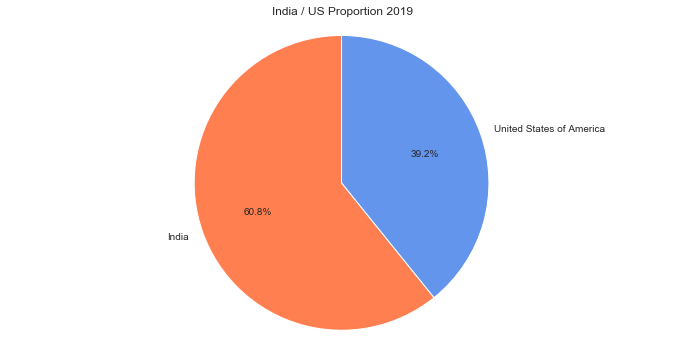

In [28]:
# plotting ratio of survey participants for India and the US

labels = df_country_comp["country"].value_counts().keys().tolist()
sizes = [len(india), len(usa)]
colors = colors_pie_2

fig1, ax1 = plt.subplots(figsize=figure_size)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors_pie_2)
ax1.axis('equal')
ax1.set_title("India / US Proportion 2019")
plt.show()

### Observations:
* India and US make around 28.5% of all answers to the Kaggle User Survey 2019
* We see a 60/40 ratio for answers from India versus answers from the US

### Conclusions:
In order to compare different features of Indian and American Data Scientists we will need to normalize values since the samples are not equal in size

## 1.1.1 Answer by country over time

In [29]:
# creating dataframes for India and the US for the years 2017 and 2018
india_2017 = df_2017[df_2017["country"] == "India"]
usa_2017 = df_2017[df_2017["country"] == "United States"]
india_2018 = df_2018[df_2018["country"] == "India"]
usa_2018 = df_2018[df_2018["country"] == "United States of America"]

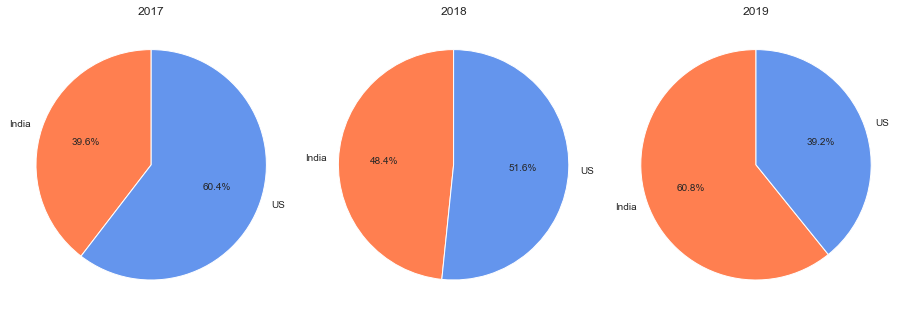

In [30]:
# plotting ratio of participants from India and the US over the last three years

labels = ["India", "US"]

sizes17 = [len(india_2017), len(usa_2017)]
sizes18 = [len(india_2018), len(usa_2018)]
sizes19 = [len(india), len(usa)]
colors = colors_pie_2

fig = plt.figure()

ax1 = fig.add_axes([.1, .3, 1, 1], aspect=1)
ax1.pie(sizes17, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

ax2 = fig.add_axes([.8, .3, 1, 1], aspect=1)
ax2.pie(sizes18, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

ax3 = fig.add_axes([1.5, .3, 1, 1], aspect=1)
ax3.pie(sizes19, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

ax1.set_title("2017")
ax2.set_title("2018")
ax3.set_title("2019")

plt.show()

## 1.2 Gender ratio
In tech we still encounter a significant difference in the ratio between men, females, none and other genders (LGBT). We were interested in seeing if this ratio would be different between India and the US.

In [31]:
# preparing data for plotting: combining gender distribution of India and the US in dataframe
global_gender_dist = perc(df, "gender").rename(columns={"gender" : "global"})
india_gender_dist = perc(india, "gender").rename(columns={"gender" : "india"})
usa_gender_dist = perc(usa, "gender").rename(columns={"gender" : "usa"})

df_gender = usa_gender_dist.merge(right=india_gender_dist, how="inner", left_index=True, right_index=True)
df_gender= df_gender.merge(right=global_gender_dist, how="inner", left_index=True, right_index=True)

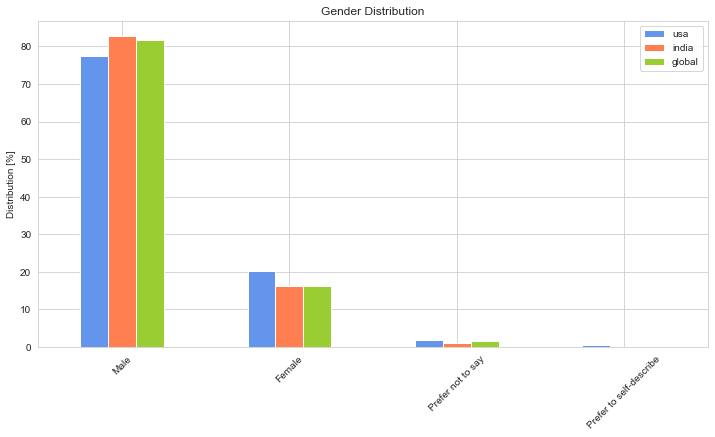

In [32]:
# plotting gender distribution
fig, ax = plt.subplots(figsize=figure_size)
df_gender.plot(kind="bar", ax=ax, rot=45, color=colors_bar_3)
ax.set_ylabel('Distribution [%]')
ax.set_title("Gender Distribution");

### Observations

The gender ratio in India is similar to the global total ratio. The ratio in the US shows that there are more answers from people described themselves as women and less from people who described themselves as men in comparison to the global gender ratio


## 1.3 Age distribution
Let's have a look at the age distribution in India, in the US and globally in comparison.

In [33]:
# preparing age dataframes
global_age_dist = perc(df, "age").rename(columns={"age" : "global"})
india_age_dist = perc(india, "age").rename(columns={"age" : "india"})
usa_age_dist = perc(usa, "age").rename(columns={"age" : "usa"})

# merge age dataframes
df_age = usa_age_dist.merge(right=india_age_dist, how="inner", left_index=True, right_index=True)
df_age = df_age.merge(right=global_age_dist, how="inner", left_index=True, right_index=True)
df_age = df_age.reset_index()
df_age = df_age.rename(columns={"index": "age"}).sort_values(by="age")
df_age = df_age.set_index("age")

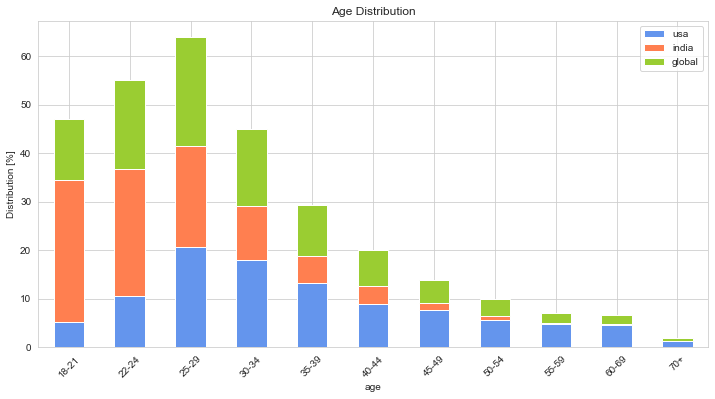

In [34]:
# plotting age distribution
fig, ax = plt.subplots(figsize=figure_size)
df_age.plot(kind="bar", ax=ax, stacked=True, rot=45, color=colors_bar_3);
ax.set_ylabel('Distribution [%]')
ax.set_title("Age Distribution");

### Observations:
* Compared to the global age distribution India has a higher percentage of young participants (< 29 years)
* From the 30-34 years bucked on there is a high decrease of Indian users.
* US has less young participants (18-24 years) than the global average, but more starting at the bucket of 25 years than the global age distribution

### Conclusion
* The age distribution shows that the majority of answers from Indian Kaggle users came from younger people under 30 while the majority of answers from US Kaggle users came from people in the middle age between 25 and 39
* This may represent the age distribution of Data Scientists by country, the Kaggle user group by country or both

## 1.3.1 Age distribution over time

In [35]:
#get data 2018
age_in = (df_2018[df_2018["country"]=="India"]["age"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"age" : "2018"}))
age_us = (df_2018[df_2018["country"]=="United States of America"]["age"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"age" : "2018"}))

#get data 2019
age_in = age_in.assign(age2019=df[df["country"]=="India"]["age"].value_counts(normalize=True))
age_in.rename(columns={"age2019" : "2019"}, inplace=True)

age_us = age_us.assign(age2019=df[df["country"]=="United States of America"]["age"].value_counts(normalize=True))
age_us.rename(columns={"age2019" : "2019"}, inplace=True)


C:\Users\Andres\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


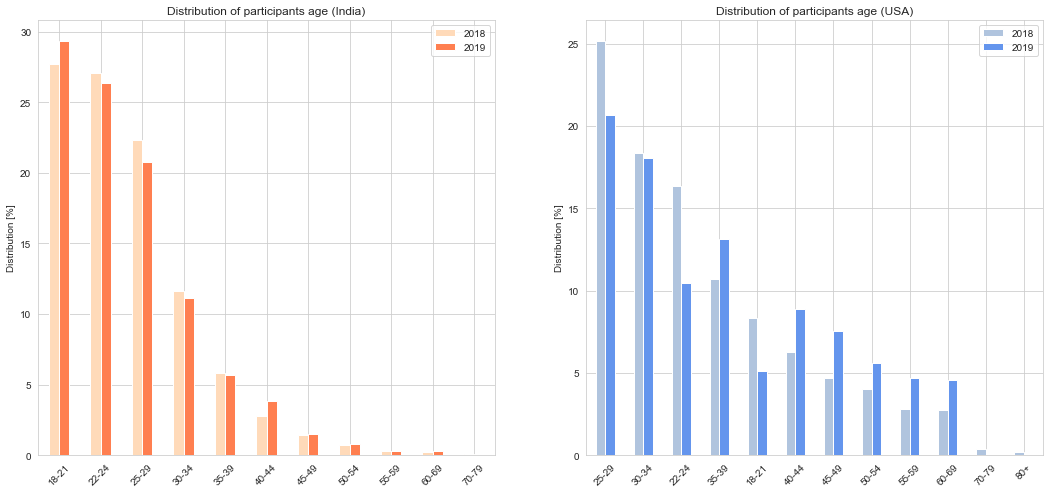

In [36]:
# plotting age distribution over time for US and India
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
plt.rcParams.update({'font.size': 10})
data1 = age_in*100
data2 = age_us*100
ax1 = data1.plot(kind="bar", ax=ax[0], grid=True, rot=45, colors=colors_years_3_in)
ax2 = data2.plot(kind="bar", ax=ax[1], grid=True, rot=45, colors=colors_years_3_us)
ax1.set_title("Distribution of participants age (India)")
ax2.set_title("Distribution of participants age (USA)")
ax1.set_ylabel('Distribution [%]')
ax2.set_ylabel('Distribution [%]')
ax1.get_yticks()
ax2.get_yticks();

# 2. Data Science in India and the US

## 2.1 Highest educational degree
Since the age distribution of survey participants from India versus participants from the US showed that Kaggle users from India on average are younger than Kaggle users from the US we had a look at the highest educational degree of the users to see if the age distribution reflects the distribution of education degrees.

In [37]:
# preparing dataframes for educational degrees for US and India
global_degree_dist = perc(df, "degree").rename(columns={"degree" : "global"})
india_degree_dist = perc(india, "degree").rename(columns={"degree" : "india"})
usa_degree_dist = perc(usa, "degree").rename(columns={"degree" : "usa"})

df_degree = usa_degree_dist.merge(right=india_degree_dist, how="inner", left_index=True, right_index=True)
df_degree = df_degree.merge(right=global_degree_dist, how="inner", left_index=True, right_index=True)

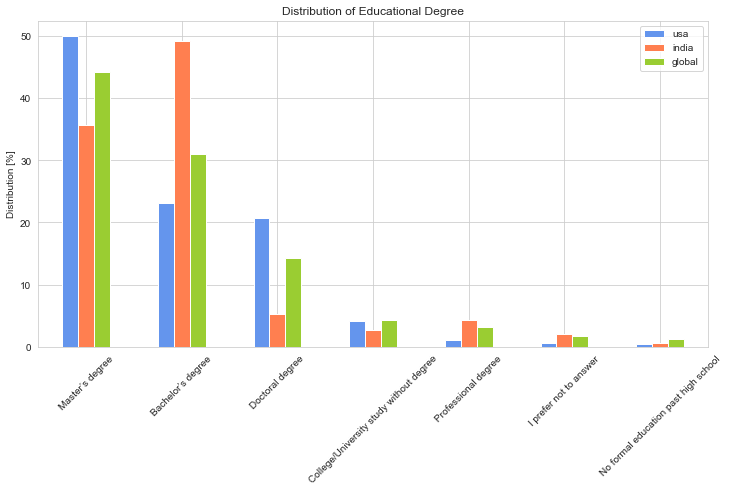

In [38]:
# plotting educational degrees for India and the US
ax = df_degree.plot(kind="bar", figsize=figure_size, rot=45, color=colors_bar_3);
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[3] = 'College/University study without degree'
ax.set_xticklabels(labels)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Educational Degree");

### Observations:
* Percentage wise most people from India who answered to the Kaggle User Survey do have a Bachelor's degree followed by a Master's degree while Doctoral degrees do have lower percentages in the Indian sample
* Answers from the US showed that the relative majority of American users do have a Master's degree

### Conclusions:
Considering the age distribution of Indian and American contributions we assume that Indian participants on average do have slightly lower educational degrees than participants from the US because of their age.

## 2.1.1 Highest educational degree over time

In [39]:
# get data 2017
degree_in = (df_2017[df_2017["country"]=="India"]["degree"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"degree" : "2017"}))
degree_us = (df_2017[df_2017["country"]=="United States"]["degree"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"degree" : "2017"}))

# uniform degrees 
replace_degree = {"Bachelor's degree" : "Bachelor’s degree",
                  "Master's degree" : "Master’s degree",
                  "Some college/university study without earning a bachelor's degree" : "Some college/university study without earning a bachelor’s degree",
                  "I did not complete any formal education past high school" : "No formal education past high school",
                 }
degree_in.rename(index=replace_degree, inplace=True)
degree_us.rename(index=replace_degree, inplace=True)

# get data 2018
degree_in = degree_in.assign(deg2018=df_2018[df_2018["country"]=="India"]["degree"]
                               .value_counts(normalize=True))
degree_in.rename(columns={"deg2018" : "2018"}, inplace=True)
degree_us = degree_us.assign(deg2018=df_2018[df_2018["country"]=="United States of America"]["degree"]
                               .value_counts(normalize=True))
degree_us.rename(columns={"deg2018" : "2018"}, inplace=True)

# get data 2019
degree_in = degree_in.assign(deg2019=df[df["country"]=="India"]["degree"]
                               .value_counts(normalize=True))
degree_in.rename(columns={"deg2019" : "2019"}, inplace=True)
degree_us = degree_us.assign(deg2019=df[df["country"]=="United States of America"]["degree"]
                               .value_counts(normalize=True))
degree_us.rename(columns={"deg2019" : "2019"}, inplace=True)

# uniform degrees 
rename_values = {"Some college/university study without earning a bachelor’s degree" : "Studied without earning degree",
                "Bachelor’s degree" : "Bachelor",
                "Master’s degree" : "Master",
                "Professional degree" : "Professional",
                "Doctoral degree" : "Doctor",
                "No formal education past high school" : "No formal education",
                "I prefer not to answer" : "No answer"
                }
degree_us.rename(index=rename_values, inplace=True)
degree_in.rename(index=rename_values, inplace=True)

In [40]:
#reorder the index
index_degree = (['Bachelor', 'Master', 'Doctor', 'Professional', 'Studied without earning degree', 'No formal education', 'No answer'])
degree_us = degree_us.reindex(index_degree)
degree_in = degree_in.reindex(index_degree)

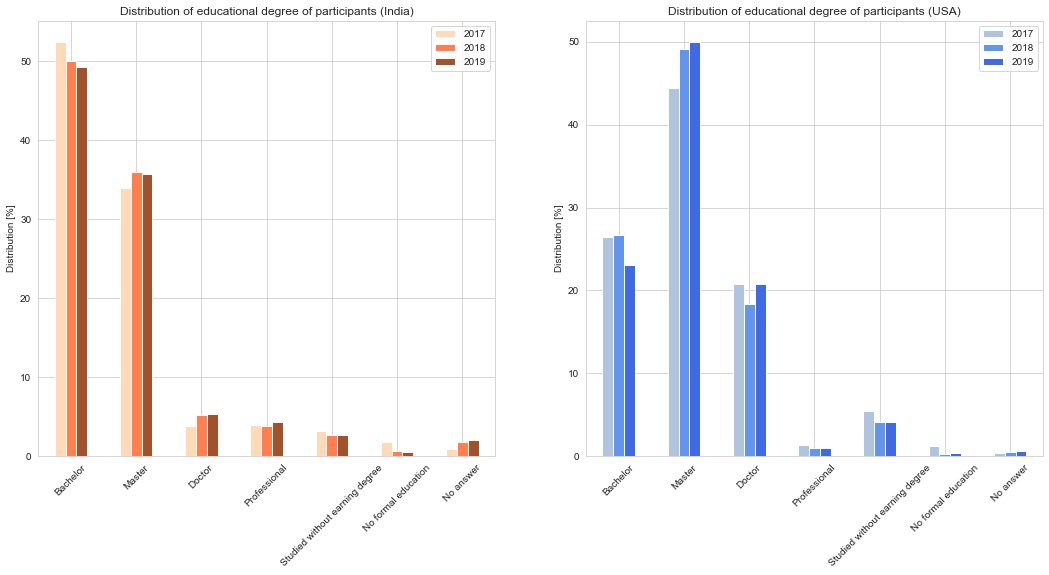

In [41]:
# plotting educational degrees over time for US and India
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
plt.rcParams.update({'font.size': 10})
data1 = degree_in*100
data2 =data2 = degree_us*100
ax1 = data1.plot(kind="bar", ax=ax[0], grid=True, rot=45, colors=colors_years_3_in)
ax2 = data2.plot(kind="bar", ax=ax[1], grid=True, rot=45, colors=colors_years_3_us)
ax1.set_title("Distribution of educational degree of participants (India)")
ax2.set_title("Distribution of educational degree of participants (USA)")
ax1.set_ylabel('Distribution [%]')
ax2.set_ylabel('Distribution [%]')
ax1.get_yticks()
ax2.get_yticks();

## 2.2 Current job position
After looking at the educational degrees let's have a look at the current position of the survey participants and see if our assumption of a relatively high percentage of students in India will be confirmed.

In [42]:
# preparing dataframes for job position names for India and the US
global_position_dist = perc(df, "position").rename(columns={"position" : "global"})
india_position_dist = perc(india, "position").rename(columns={"position" : "india"})
usa_position_dist = perc(usa, "position").rename(columns={"position" : "usa"})

df_position = usa_position_dist.merge(right=india_position_dist, how="inner", left_index=True, right_index=True)
df_position = df_position.merge(right=global_position_dist, how="inner", left_index=True, right_index=True)

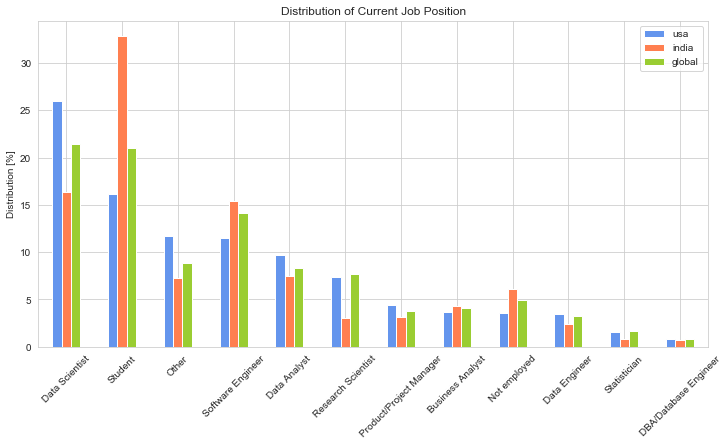

In [43]:
ax = df_position.plot(kind="bar", figsize=figure_size, rot=45, color=colors_bar_3)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Current Job Position");


### Observations:
* Within the participants from the US "Data Scientist" is the most commonly chosen job description
* Percentage wise most of the participants from India are currently students

### Conclusions:
* Indeed over one third of the participants from India are currently students. Since this is much more than the percentage of participants from India who stated to be without any educational degree, we assume that many  students from India interested in Data Science are currently aiming for a second degree, e.g. a Master's degree, or at least will gain enough experience in their field.
* We assume that these students are going to finish their studies within the next years and become some great Data Scientists, Engineers, Analysts, etc. (or at least some of them are going to be!)

## 2.3 Salary

When looking at the proportion of educational degrees among India and the US we would expect to find a slightly different salary distribution in the US and India. Due to the high amount of students within the Indian participants we expect a higher percentage of people with a low income from India versus a higher percentage of people with a medium or high income in the US according to the high percentage of Master's degrees within the survey answers from the US.

In [44]:
# preparing dataframes for salary distribution within Data Science for India and the US
global_salary_dist = perc(df, "salary").rename(columns={"salary" : "global"})
india_salary_dist = perc(india, "salary").rename(columns={"salary" : "india"})
usa_salary_dist = perc(usa, "salary").rename(columns={"salary" : "usa"})

df_salary = usa_salary_dist.merge(right=india_salary_dist, how="inner", left_index=True, right_index=True)
df_salary = df_salary.merge(right=global_salary_dist, how="inner", left_index=True, right_index=True)
df_salary = df_salary.reset_index().rename(columns={"index" : "salary"}).sort_values("salary").set_index("salary")

# reordering salaries
df_salary = df_salary.reindex(index = ["$0-999", "1,000-1,999", "2,000-2,999",  "3,000-3,999", "4,000-4,999", 
                                       "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", 
                                       "25,000-29,999", "30,000-39,999", "40,000-49,999", "50,000-59,999", 
                                       "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", 
                                       "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999",
                                       "250,000-299,999", "300,000-500,000", "> $500,000"])

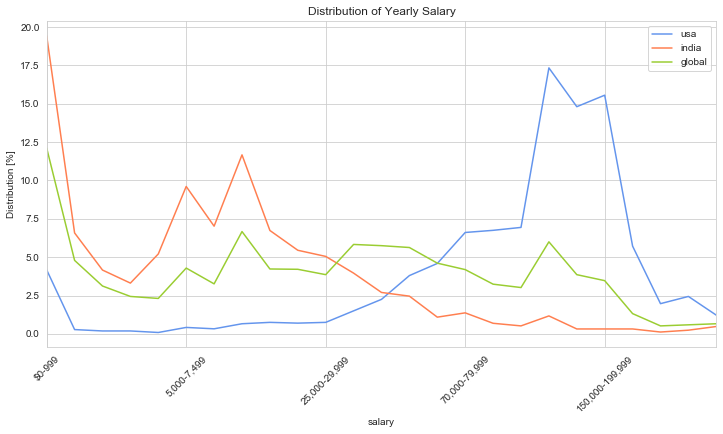

In [45]:
ax = df_salary.plot(kind="line", figsize=figure_size, rot=45, color=colors_bar_3)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Yearly Salary");

### Observations:
* Within the India sample there is a relatively high percentage of people with an income between 0 and 999 Dollars. Apart from that the most value accumulate around the 5.000 – 10.000 buckets.
* Within the US sample there also is a moderate percentage of people with an income between 0 and 999 Dollars but this percentage is smaller than the percentage within the Indian sample. Apart from that the most values accumulate around the 100.000 and 150.000 Dollar buckets.

### Conclusions:
* We expected to find a relatively lower average income within the Indian sample - both due to the high percentage of students and the economical differences between India and the US. In fact we find a significantly high amount of people with low income in India.
* Within the group of survey participants from India the income of people with a regular income seems to accumulate around the 5.000 – 10.000 buckets which may be the mean average salary for Data Scientists in India. The higher the income is the lower the percentage within the Indian sample.
* In the US respectively there is only a relatively small percentage of people with a really low income. The majority groups between 100.000 and 150.000 Dollars which is probably the mean regular salary of Data Scientist of any kind in the US.
* This distribution fits our assumptions regarding the distribution of studying versus working Data Scientists within both samples.

## 2.4 Company size
Looking at the potential of upcoming Data Scientists within India and the US we want to examine the current state of the DS industry in both our samples. Evaluating the company size offers insights on the exploitment of the potentials of DS across India and the US. 

In [46]:
# preparing dataframes for company size distribution
global_company_size_dist = perc(df, "company_size").rename(columns={"company_size" : "global"})
india_company_size_dist = perc(india, "company_size").rename(columns={"company_size" : "india"})
usa_company_size_dist = perc(usa, "company_size").rename(columns={"company_size" : "usa"})

df_company_size = usa_company_size_dist.merge(right=india_company_size_dist, how="inner", left_index=True, right_index=True)
df_company_size = df_company_size.merge(right=global_company_size_dist, how="inner", left_index=True, right_index=True)

# reordering index
df_company_size = df_company_size.reset_index().rename(columns={"index" : "company_size"}).sort_values("company_size").set_index("company_size")
df_company_size = df_company_size.reindex(index = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "> 10,000 employees"])


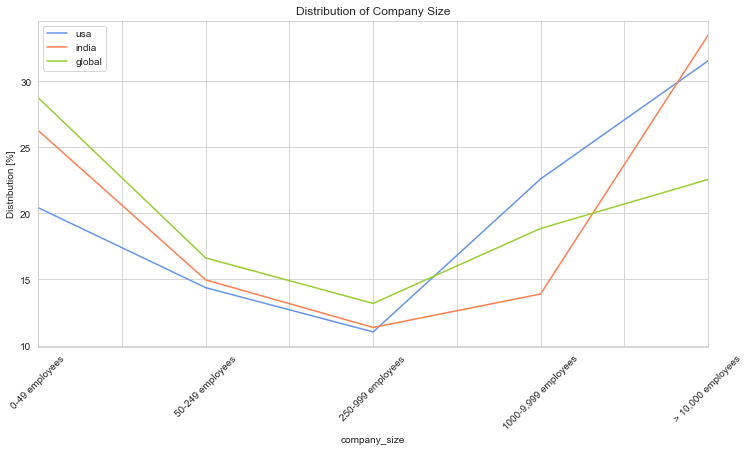

In [47]:
ax = df_company_size.plot(kind="line", figsize=figure_size, rot=45, color=colors_bar_3)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Company Size");

### Observations:
* Compared to the US a higher percentage of small Indian companies with 1 – 250 employees applies DS methodology
* Within the company size range between 1.000 and 9.999 employees more companies in the US use DS
* In companies with >10.000 employees Indian companies take over, regarding the use of DS tools and methodology. 

### Conclusions:
* Over all company sizes India and the US do not vary a lot from the global distribution.
* Higher percentages of people from India than from the US work in very small or very big companies applying any kind of Data Science. We can assume that quite small and quite big companies tend to apply Data Science more often than companies of middle size.

# 3. Tools and technologies

## 3.1 Programming languages

We want to know if the tools and technologies used in the Data Science context differ between India and the US. The use of different programming languages could show trends and help young Data Scientists decide which languages to practice first.

In [48]:
# preparing dataframes for the use of programming languages in India and the US
languages_india = undummy(india, "Q18")
languages_india = languages_india.drop("2", axis=0)
languages_india = languages_india.rename(index={0: "Python"})

languages_usa = undummy(usa, "Q18")
languages_usa = languages_usa.drop("2", axis=0)
languages_usa = languages_usa.rename(index={0: "Python"})

# merging dataframes
languages = languages_india.merge(right=languages_usa, how="inner", left_index=True, right_index=True)
languages = languages.rename(columns={"value_x": "india", "value_y": "usa"})

# normalizing
languages_perc = total_to_perc(languages, india, usa, "india", "usa")
languages_perc = languages_perc[['usa', 'india']]

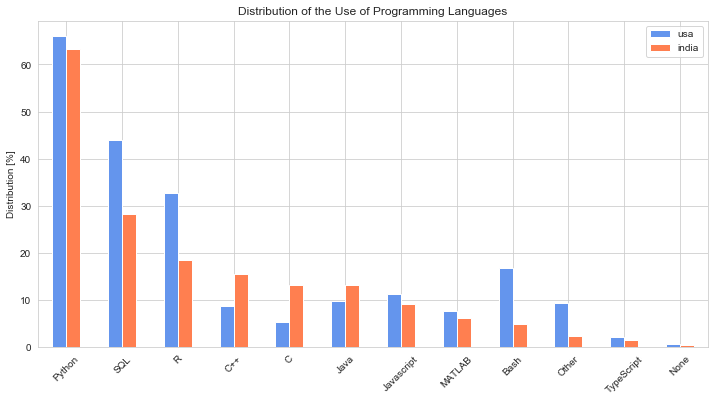

In [49]:
# plotting programming languages percentages
fig, ax = plt.subplots(figsize=figure_size)
languages_perc.plot(kind="bar", ax=ax, rot=45, color=colors_bar_2)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of the Use of Programming Languages");

### Observations:
* Within both India and the US Python is the programming language most participants use
* In the US higher percentages of programmers use SQL, R and Bash than in India
* In India higher percentages of programmers use C++, C and Java than in the US

## 3.2 Programming experience
The programming experience in years in conjunction with age and degree can be an indicator for the time the surveys participants have been interested in, or practicing Data Science.
Based on the results of the age and educational degree visualization we expect a high percentage of people from India with less programming experience and a more flat distribution for people in the US.

In [50]:
# preparing dataframes for programming experience in India and the US
india_exp_dist = perc(india, "Q15").rename(columns={"Q15": "india"})
usa_exp_dist = perc(usa, "Q15").rename(columns={"Q15": "usa"})
df_exp = usa_exp_dist.merge(right=india_exp_dist, how="inner", left_index=True, right_index=True)

# reordering index
df_exp = df_exp.reindex(["I have never written code", "< 1 years", "1-2 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"])

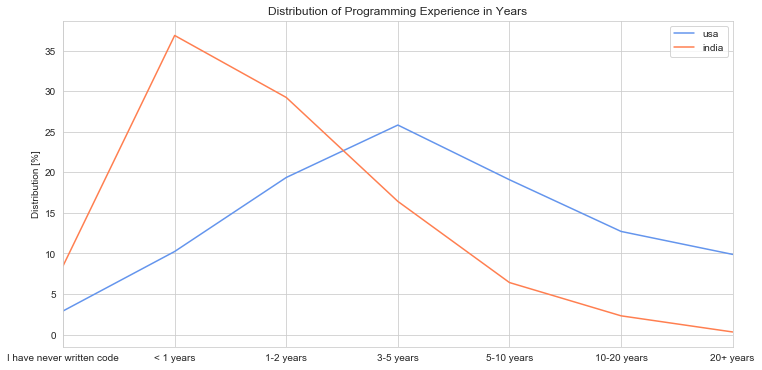

In [51]:
# plotting programming experience percentages
fig, ax = plt.subplots(figsize=figure_size)
df_exp.plot(kind="line", ax=ax, color=colors_bar_2)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Programming Experience in Years");

### Observations:
* Indian participants have less programming experience (<2 years). 
* US participants have a moderate increas until its peak with a experience of 3–5 years. 

### Conclusions:
As assumed the distribution of programming experience in years is similar to the age distribution for both India and the US

## 3.3 Machine Learning experience
The machine learning experience can be an indicator for a digital transformation towards machine learning in the field of Data Science.

Similar to the programming experience we assume a high percentage of people from India have a shorter machine learning experience in comparison to people from the US.

In [52]:
# preparing dataframes for machine learning experience in India and the US
india_exp_ml_dist = perc(india, "Q23").rename(columns={"Q23": "india"})
usa_exp_ml_dist = perc(usa, "Q23").rename(columns={"Q23": "usa"})
df_exp_ml = usa_exp_ml_dist.merge(right=india_exp_dist, how="inner", left_index=True, right_index=True)

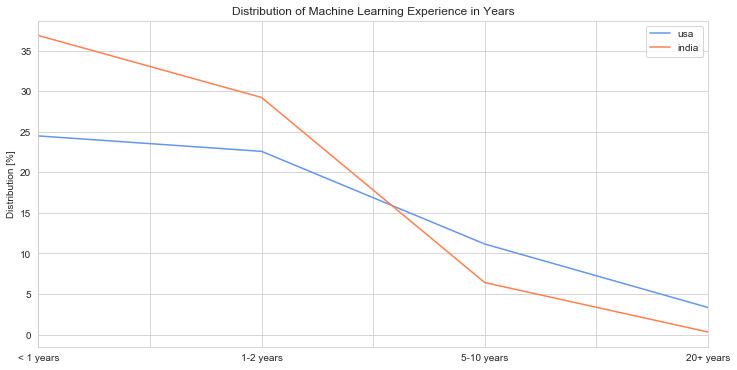

In [53]:
# plotting machine learning experience percentages
fig, ax = plt.subplots(figsize=figure_size)
df_exp_ml.plot(kind="line", ax=ax, color=colors_bar_2)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of Machine Learning Experience in Years");

### Observations:
* A high percentage of Indian participants have less than 2 years of machine learning experience.
* In comparison the distribution of machine learning experience of participants from the US is more flat and more equally distributed between <1 year and 20+ years

### Conclusions:
* There is a high percentage of people from India with a lower amount of machine learning experience. This outcome fits the conclusion in age and degree for India
* Other than the programming experience almost 50% of participants from India seem to have started machine learning within the last year. This may be an indicator for a growing interest towards machine learning in India and this topic being part of educational programs of Indian students.

## 3.4 Machine learning algorithms
Based on the observations regarding programming and machine learning experience we wanted to know if there are any differences in the distribution of machine learning algorithms between India and the US.

In [54]:
# preparing dataframes for machine learning algorithms used in India and the US
ml_tools_india = undummy(india, "Q24")
ml_tools_india = ml_tools_india.rename(index={0: "Linear or Logistic Regression"})
ml_tools_usa = undummy(usa, "Q24")
ml_tools_usa = ml_tools_usa.rename(index={0: "Linear or Logistic Regression"})

ml_tools = ml_tools_india.merge(right=ml_tools_usa, how="inner", left_index=True, right_index=True)
ml_tools = ml_tools.rename(columns={"value_x": "india", "value_y": "usa"})
ml_tools = ml_tools.drop("1", axis=0)

In [55]:
ml_tools_perc = total_to_perc(ml_tools, india, usa, "india", "usa")
ml_tools_perc = ml_tools_perc[['usa', 'india']]

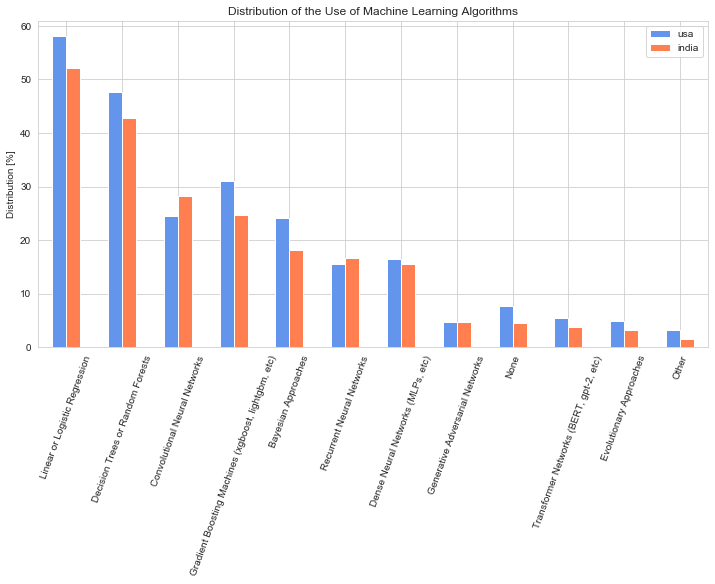

In [61]:
# plotting machine learning algorithms percentage
fig, ax = plt.subplots(figsize=figure_size)
ml_tools_perc.plot(kind="bar", ax=ax, color=colors_bar_2, rot=70)
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of the Use of Machine Learning Algorithms");

### Observations:
* For almost all algorithms we see a slightly higher percentage of participants from the US stated to use these in comparison to participants from India
* The only exception are Convolutional Neural Network algorithms - a slightly higher percentage of participants from India seem to use these

### Conclusions:
* We are not surprised to see lower percentages for most machine learning algorithms in India than in the US since we saw that many participants from India are still in the process of learning about Data Science. 
* Since the machine learning experience of participants from the US is longer on average these participants of course had more time to practice and apply different types of ML algorithms e.g. in their jobs.
* The distribution of the regular application of these machine learning algorithms can also relate to the educational degree and age of the participants: With growing age and education the experience with ML algorithms on a regular basis increases in the field of Data Science.

## 3.5 Learning Resources
Last but not least we wanted to know which resources participants use to learn about Data Science related topics - especially since we saw that a high percentage of participants from India are currently students.

In [57]:
# preparing dataframes for Data Science learning resources used in India and the US
resources_india = undummy(india, "Q13")
resources_usa = undummy(usa, "Q13")

resources = resources_india.merge(right=resources_usa, how="inner", left_index=True, right_index=True)
resources = resources.rename(columns={"value_x": "india", "value_y": "usa"})

resources_perc = total_to_perc(resources, india, usa, "india", "usa")

resources_perc = resources_perc[['usa', 'india']]

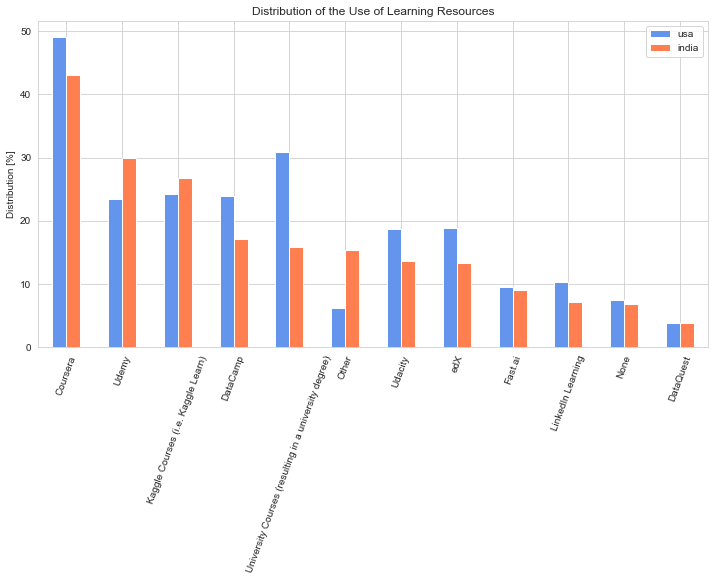

In [62]:
# plotting learning resources percentages
fig, ax = plt.subplots(figsize=figure_size)
resources_perc.plot(kind="bar", ax=ax, color=colors_bar_2, rot=70)   
ax.set_ylabel('Distribution [%]')
ax.set_title("Distribution of the Use of Learning Resources");

### Observations:
* The most popular learning resource among both participants from India and the US seems to be Coursera
* We see bigger differences in the percentages for participants from India and the US in the use of "Other" learning resorces as well as learning within University Courses

### Conclusions:
* Surprisingly round double the percentage of participants from the US stated to learn through University Courses compared to participants from India. This may mean that even though a higher percentage of Indian participants interested in Data Science is currently studying at university not all of these students study a topic related to Data Science.
* Due to the difference in the student/employed ratio and the ratio of people learning in University Courses versus people who learn from online resources we assume that a significantly amount of Indian students learn about Data Science online while studying a different topic. This may be an indicator for the assumption that Data Science is of growing importance in different industries in India.